* DAMI Assignment *

# Who Survived the Titanic Disaster?

## 1. Introduction

In this Titanic example, we will use decision trees. The main advantage of this model is that humans can easily understand and reproduce the sequence of decisions taken to predict the target class of a new data point.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the decision rather than just saying this is what the training data suggests (which is, by definition, what every supervised learning method does).

The problem we would like to solve is determining whether a Titanic passenger would have survived, given their age, class, and sex.

Why age, class and sex features?

Answer: Particular features (the name is an extreme case) could result in overfitting (consider a tree that asks if the name is X; she survived). Features for which a small number of instances with each value present a similar problem. They might not be helpful for generalisation. We will use class, age, and sex because we expect them to have possibly influenced the passenger's survival.

For this assignment, you need this Jupyter notebook and this dataset Download dataset. Have fun with data mining and building trees!

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [3]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## Your code ...

# read with pandas into a dataframe
df_titanic = pd.read_csv('passengers-titanic.csv')

# show the first 5 rows
df_titanic.head()

numpy version: 1.26.4
matplotlib version: 2.2.1


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


Also show the 10 last rows. What is the problem in the last couple of rows?


In [4]:
## Your code ...

# show 10 last rows
df_titanic.tail(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1303,1304,3rd,0,"Yasbeck, Mr Antoni",NaN,NaN,NaN,NaN,NaN,NaN,male
1304,1305,3rd,1,"Yasbeck, Mrs Antoni",NaN,NaN,NaN,NaN,NaN,NaN,female
1305,1306,3rd,0,"Youssef, Mr Gerios",NaN,NaN,NaN,NaN,NaN,NaN,male
1306,1307,3rd,0,"Zabour, Miss Hileni",NaN,NaN,NaN,NaN,NaN,NaN,female
1307,1308,3rd,0,"Zabour, Miss Tamini",NaN,NaN,NaN,NaN,NaN,NaN,female
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


# problem: ?
The table shows several rows from the dataset with missing information. There are lots of "NaN" values across multiple columns. This shows that several potentially important fields miss data such as age or cabin number. Missing data will present issues for data analysis and machine learning. ( We need complete datasets) It is important to handle these missing values through filling them or dropping them.

### 2.2. Investigate Dataset

How does Pandas interpret the data? The following 3 commands can be used to investigate the data. Describe in your own words what the command does.

df_titanic.dtypes

## Your answer ...
This command is used to check the data types of each column within the df_titanic DataFrame. It returns a Series with the column names as the index labels and the data type of each column (e.g., float64, int64, object) as the values. This is crucial for ensuring that data is stored in the correct format for analysis. For instance, you'd expect numerical values like age and fare to be floating-point or integer types, whereas categorical data like embarkation point might be of the 'object' type (often string data in pandas). Knowing the data types helps in deciding how to preprocess the data, such as converting types where necessary or handling missing values appropriately.

df_titanic.info()

## Your answer ...
The info() method provides a concise summary of the DataFrame. This includes information like the total number of entries, the number of non-null entries per column, the data type of each column, and the memory usage of the DataFrame. This command gives a quick overview of the data's structure, helping to identify columns with missing values that may require imputation. Additionally, by showing the data types, it complements the .dtypes command by providing a more detailed context about the dataset's overall health and readiness for analysis.

df_titanic.describe()

## Your answer ...
The describe() method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. It's applicable to numerical columns by default but can be used on categorical data by setting the include parameter. For numerical data, it provides a count of non-null entries, mean, standard deviation, minimum and maximum values, and the quartiles of the data distribution. This command is invaluable for getting a sense of the data's scale, spotting potential outliers, and understanding the distribution characteristics of each numerical feature. It helps in making informed decisions about scaling, normalization, or whether certain features require transformation before further analysis.

In [5]:
# Slice and print the first 10 rows of the 'age' column. 

## Your code ...
print(df_titanic['age'].head(10))

0    29.0000
1     2.0000
2    30.0000
3    25.0000
4     0.9167
5    47.0000
6    63.0000
7    39.0000
8    58.0000
9    71.0000
Name: age, dtype: float64


# What kind of object is this 'age' column?   
The 'age' column is recognized as a pandas Series object containing floating-point numbers. In pandas, a Series is essentially a one-dimensional array that pairs values with their indexes, making it different from both a numpy array and a DataFrame. While a DataFrame is a table with rows and columns, a Series represents a single column within that table.

# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called data Series.

In [6]:
# What is the average age over all passengers?

## Your code ...
average_age = df_titanic['age'].mean()
print(f"The average age of all passengers is: {average_age}")

The average age of all passengers is: 31.19418104265403


In [7]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Slice the columns 'sex', 'pclass', 
# and 'age'.

## Your code ...
subset_df_titanic = df_titanic[['sex', 'pclass', 'age']]
print(subset_df_titanic)

         sex pclass      age
0     female    1st  29.0000
1     female    1st   2.0000
2       male    1st  30.0000
3     female    1st  25.0000
4       male    1st   0.9167
...      ...    ...      ...
1308    male    3rd      NaN
1309    male    3rd      NaN
1310    male    3rd      NaN
1311  female    3rd      NaN
1312    male    3rd      NaN

[1313 rows x 3 columns]


In [8]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values you can use:
df_titanic[df_titanic['age'].isnull()][['sex', 'pclass', 'age']]

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
...,...,...,...
1308,male,3rd,NaN
1309,male,3rd,NaN
1310,male,3rd,NaN
1311,female,3rd,NaN


<Axes: >

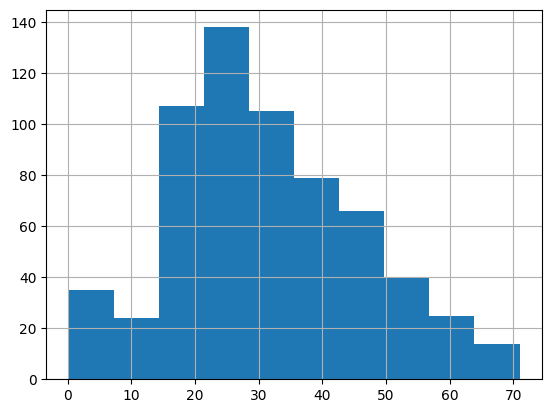

In [10]:
# Before we finish the initial investigation, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. 
import matplotlib as pyl
df_titanic['age'].hist()

<Axes: >

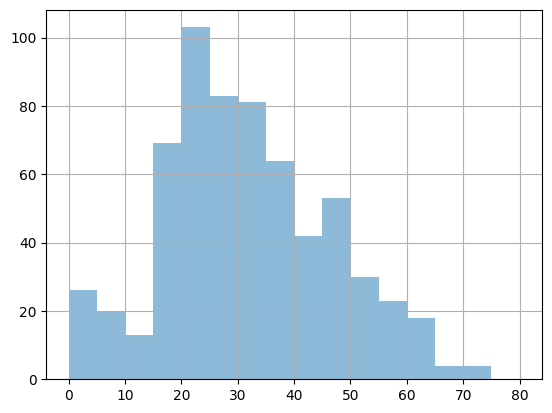

In [11]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df_titanic['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)

## 3. Data Munging

### 3.1. Transform the Data 

Transform the values in the dataframe into the shape we need for machine learning. 

First of all, it's hard to run analysis on the string values of "male" and "female". 
Let's store this transformation into a new column 'Sex'. We have a precedent of analyzing the women first, so let's decide female = 0 and male = 1.  

In [13]:
# Let's store our transformation in a new column, so the original sex isn't changed. Show the first 3 instances.

## Your code ...
df_titanic['Sex'] = df_titanic['sex'].map({'female': 0, 'male': 1})
print(df_titanic[['sex', 'Sex']].head(3))

      sex  Sex
0  female    0
1  female    0
2    male    1


In [14]:
# Do the same for passenger class, make it numeric, in a new column PClass. Show the first 3 instances.

## Your code ...
df_titanic['PClass'] = df_titanic['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
print(df_titanic[['pclass', 'PClass']].head(3))

  pclass  PClass
0    1st       1
1    1st       1
2    1st       1


In [15]:
# Show all males in the second class

## Your code ...
males_in_second_class = df_titanic[(df_titanic['Sex'] == 1) & (df_titanic['PClass'] == 2)]
print(males_in_second_class)

     row.names pclass  survived                           name   age  \
322        323    2nd         0             Abelson, Mr Samuel  30.0   
324        325    2nd         0        Andrew, Mr Edgar Samuel  18.0   
325        326    2nd         0               Andrew, Mr Frank   NaN   
326        327    2nd         0           Angle, Mr William A.  34.0   
328        329    2nd         0                 Ashby, Mr John  57.0   
..         ...    ...       ...                            ...   ...   
593        594    2nd         1           Wilhelms, Mr Charles  32.0   
595        596    2nd         1    Williams, Mr Charles Eugene   NaN   
598        599    2nd         0  Aldworth, Mr Charles Augustus  30.0   
600        601    2nd         0                Pernot, Mr Rene   NaN   
601        602    2nd         0               Swane, Mr George  18.0   

        embarked                                 home.dest  room      ticket  \
322    Cherbourg                       Russia New York,

### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

We know the average age of all passengers (with valid age field) is 31.2 - we could fill in the null values with that mean value. But may be the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem positively skewed. These are the kind of decisions you make as you create your models.

In [16]:
# Replace the NaN (unknown) age values with a reasonable estimate. Do this in a new column 'AgeFill'

# Optionally, if you like a bit more programming try this one ...
# Use the mean age that was typical for males and females in each passenger class 

## Your code ...
mean_ages = df_titanic.groupby(['Sex', 'PClass'])['age'].mean()

# Next, we define a function that will be applied to each row
def fill_age(row):
    # If age is NaN, return the mean age for the corresponding 'Sex' and 'PClass'
    if pd.isnull(row['age']):
        return mean_ages[row['Sex'], row['PClass']]
    else:
        # If age is not NaN, just return the original age
        return row['age']

# Create the new 'AgeFill' column by applying the function
df_titanic['AgeFill'] = df_titanic.apply(fill_age, axis=1)

# Verify the transformation by displaying rows where 'age' was NaN
print(df_titanic[df_titanic['age'].isnull()][['Sex', 'PClass', 'age', 'AgeFill']].head())

    Sex  PClass  age    AgeFill
12    0       1  NaN  37.772277
13    1       1  NaN  41.199334
14    1       1  NaN  41.199334
29    1       1  NaN  41.199334
32    1       1  NaN  41.199334


### 3.3 Hot Encoding

We have a categorical feature attribute: pclass. We already converted its three classes into 1, 2, and 3. This transformation implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [17]:
df_titanic['FirstClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df_titanic['SecondClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df_titanic['ThirdClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)

df_titanic.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Sex,PClass,AgeFill,FirstClass,SecondClass,ThirdClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000,1,0,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000,1,0,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1,30.0000,1,0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000,1,0,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167,1,0,0


## 4. Finalize Dataset for Analysis

In [18]:
# Finalize pre-processing by turning this into a numerical feature set (dataframe titanic_X) and a numerical target column 
# (dataframe titanic_y)

## Your code ...
titanic_y = df_titanic['survived']
titanic_X = df_titanic[['Sex', 'PClass', 'AgeFill']]

In [19]:
titanic_X.head(10)

,Sex,PClass,AgeFill
0,0,1,29.0000
1,0,1,2.0000
2,1,1,30.0000
3,0,1,25.0000
4,1,1,0.9167
5,1,1,47.0000
6,0,1,63.0000
7,1,1,39.0000
8,0,1,58.0000
9,1,1,71.0000


In [20]:
titanic_y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

## 5. Analyse Dataset

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple example, it can take some time to make data look as our methods expect. It is also very important in the overall machine learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), the following steps will fail, no matter how good the method we use for learning!!

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

### 5.1. Training a Decision Tree Classifier

In [21]:
# Now to the interesting part; let's build a decision tree from our training data. 
# As usual, first separate training and testing data, and check the size of both sets.
from sklearn.model_selection import train_test_split

## Your code ...
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.2, random_state=42)

# Checking the size of both sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1050 samples
Testing set size: 263 samples


In [22]:
# Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job. 
# Parameter settings: use the entropy citerion and try out different settings for the depth of the tree and the 
# minimum samples required for a node in the tree graph
from sklearn import tree

## Your code ...
dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=42)

# Training the classifier with the training set
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=42)

### 5.2. Evaluation Metrics Function

In [25]:
# Define a generic helper function to measure the performance of the classifier, and call this function to show 
# the results (e.g. accuracy)
from sklearn import metrics

## Your code ...
def evaluate_classifier_performance(y_true, y_pred, set_name='Training'):
    """
    Evaluates and prints the classifier's performance metrics.
    
    Parameters:
    - y_true: array-like of true labels.
    - y_pred: array-like of predicted labels.
    - set_name: a string indicating the name of the set (Training or Testing).
    """
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    print(f"{set_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Predictions on the training set
y_train_pred = dt_classifier.predict(X_train)

# Predictions on the testing set
y_test_pred = dt_classifier.predict(X_test)

# Evaluate the classifier performance on the Training set
evaluate_classifier_performance(y_train, y_train_pred, set_name='Training')

# Evaluate the classifier performance on the Testing set
evaluate_classifier_performance(y_test, y_test_pred, set_name='Testing')


Training Set Metrics:
Accuracy: 0.8343
Precision: 0.8462
Recall: 0.6215
F1 Score: 0.7166

Testing Set Metrics:
Accuracy: 0.8099
Precision: 0.8261
Recall: 0.6000
F1 Score: 0.6951


## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Implement Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [28]:
# Implement a Random Forest classifier, does this improve the prediction?

## Your code ...
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
# Start with n_estimators = 100, a common default value
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the classifier with the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Predictions on the testing set
y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier performance on the Training set
evaluate_classifier_performance(y_train, y_train_pred_rf, set_name='Training')

# Evaluate the classifier performance on the Testing set
evaluate_classifier_performance(y_test, y_test_pred_rf, set_name='Testing')

Training Set Metrics:
Accuracy: 0.8619
Precision: 0.8828
Recall: 0.6808
F1 Score: 0.7687

Testing Set Metrics:
Accuracy: 0.8061
Precision: 0.7895
Recall: 0.6316
F1 Score: 0.7018


The Random Forest model has shown improvements, especially in handling the training data, indicating better learning and generalization capabilities. On the testing set, the slight decrease in accuracy and precision is traded off for improved recall and F1 score